In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import requests
from bs4 import BeautifulSoup

# GETTING STARTED

This is the URL of IS-Academia where you can fill the form to obtain information on a given semester.

In [2]:
BASE_URL = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_i_reportModel=133685247'

In [3]:
r = requests.get(BASE_URL)

In [4]:
html_doc = r.text

Let's have a look at the HTML file from our base URL.

In [5]:
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <div>
   </div>
   <title>
   </title>
   <script src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr" type="text/javascript">
   </script>
   <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css">
    <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator" rel="stylesheet" type="text/css"/>
   </link>
  </meta>
 </head>
 <body alink="#666666" bgcolor="#ffffff" link="#666666" marginheight="0" marginwidth="5" vlink="#666666">
  <div class="filtres">
   <form action="!GEDPUBLICREPORTS.filter" method="GET" name="f">
    <input name="ww_b_list" type="hidden" value="1">
     <input name="ww_i_reportmodel" type="hidden" value="133685247">
      <input name="ww_c_langue" type="hidden" value="">
       <h1 id="titre">
        Liste des étudiants inscrits par semestre
       </h1>
       <table border="0" id="format">
 

We see that all the form information is contained inside the a `table` element having `id="filtre"`.

In [6]:
form_table = soup.find("table", {"id" : "filtre"})
print(form_table.prettify())

<table border="0" id="filtre">
 <tr>
  <th>
   Unité académique
  </th>
  <td>
   <input name="zz_x_UNITE_ACAD" type="hidden" value="">
    <select name="ww_x_UNITE_ACAD" onchange="document.f.zz_x_UNITE_ACAD.value=document.f.ww_x_UNITE_ACAD.options[document.f.ww_x_UNITE_ACAD.selectedIndex].text">
     <option value="null">
     </option>
     <option value="942293">
      Architecture
     </option>
     <option value="246696">
      Chimie et génie chimique
     </option>
     <option value="943282">
      Cours de mathématiques spéciales
     </option>
     <option value="637841336">
      EME (EPFL Middle East)
     </option>
     <option value="942623">
      Génie civil
     </option>
     <option value="944263">
      Génie mécanique
     </option>
     <option value="943936">
      Génie électrique et électronique
     </option>
     <option value="2054839157">
      Humanités digitales
     </option>
     <option value="249847">
      Informatique
     </option>
     <option va

After selecting the different values in the dropdown windows for building the query, clicking `OK` and selecting the file we are interested in (not `Tous`), we see that the generated URL is of the type:<br>
'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?ww_x_GPS=19561998&ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270&ww_x_UNITE_ACAD=249847&ww_x_PERIODE_ACAD=978181&ww_x_PERIODE_PEDAGO=942175&ww_x_HIVERETE=null'<br>
Thus, we are interested in getting the values for:
- academic unit: `Informatique`
- academic year: from `2007-2008` to `2016-2017`
- semester type: `Bachelor semestre 1`, etc

Let's get the different forms: `Unité académique`, `Période académique`, `Période pédagogique`, `Type de semestre` from the base URL.

In [7]:
acad_units_elem = form_table.find("input", {"name" : "zz_x_UNITE_ACAD"})
acad_years_elem = form_table.find("input", {"name" : "zz_x_PERIODE_ACAD"})
semesters_elem = form_table.find("input", {"name" : "zz_x_PERIODE_PEDAGO"})
semester_type_elem = form_table.find("input", {"name" : "zz_x_HIVERETE"})

In [8]:
def get_frame_from_element(element):
    all_options = element.find_all("option")
    option_dict = {option.text: option.attrs['value'] for option in all_options if 'null' not in option.attrs['value']}
    option_frame = pd.DataFrame.from_dict(option_dict,orient='index')
    option_frame.columns.name = 'Field'
    option_frame.rename(columns = {0:'Code'},inplace=True)
    option_frame.sort_index(inplace=True)
    return option_frame

The previous function helps us visualizing the content of the downloaded HTML elements by transforming them in DataFrame's.

In [9]:
acad_units = get_frame_from_element(acad_units_elem)
acad_units

Field,Code
Architecture,942293
Chimie et génie chimique,246696
Cours de mathématiques spéciales,943282
EME (EPFL Middle East),637841336
Génie civil,942623
Génie mécanique,944263
Génie électrique et électronique,943936
Humanités digitales,2054839157
Informatique,249847
Ingénierie financière,120623110


In [10]:
acad_years = get_frame_from_element(acad_years_elem)
acad_years

Field,Code
2007-2008,978181
2008-2009,978187
2009-2010,978195
2010-2011,39486325
2011-2012,123455150
2012-2013,123456101
2013-2014,213637754
2014-2015,213637922
2015-2016,213638028
2016-2017,355925344


In [11]:
semesters = get_frame_from_element(semesters_elem)
semesters

Field,Code
Bachelor semestre 1,249108
Bachelor semestre 2,249114
Bachelor semestre 3,942155
Bachelor semestre 4,942163
Bachelor semestre 5,942120
Bachelor semestre 5b,2226768
Bachelor semestre 6,942175
Bachelor semestre 6b,2226785
Master semestre 1,2230106
Master semestre 2,942192


In [12]:
semester_type = get_frame_from_element(semester_type_elem)
semester_type

Field,Code
Semestre d'automne,2936286
Semestre de printemps,2936295


<hr>
The following function helps us retrieving the HTML page for a given form.<br>
It does it in three steps:
1. it fills in the form in the BASE_URL with the values that we pass;
2. extracts the GPS parameter embedded in the link to the page we want to get;
3. retrieves the page.

In [13]:
def get_html_page(acad_unit, acad_year, semester, semester_type):
    
    # Filter URL strings
    BASE = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?'
    REPORT_MODEL = 'ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_i_reportModelXsl=133685270'
    ACAD_UNIT = 'zz_x_UNITE_ACAD=&ww_x_UNITE_ACAD'
    ACAD_YEAR = 'zz_x_PERIODE_ACAD=&ww_x_PERIODE_ACAD'
    SEMESTER = 'zz_x_PERIODE_PEDAGO=&ww_x_PERIODE_PEDAGO'
    SEMESTER_TYPE = 'zz_x_HIVERETE=&ww_x_HIVERETE'
    SUFFIX = 'dummy=ok'
    
    # Send HTTP GET to compile the form
    query_url = ''.join([BASE, REPORT_MODEL, '&', ACAD_UNIT, '=', acad_unit, '&', ACAD_YEAR, '=', acad_year, 
                        '&', SEMESTER, '=', semester, '&', SEMESTER_TYPE, '=', semester_type, '&', SUFFIX])
    r = requests.get(query_url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    
    # Extract the GIS parameter
    generated_links = soup.find_all("a", attrs={"class": "ww_x_GPS"})
    onclick_values = [link.attrs['onclick'] for link in generated_links]
    gps_value = None
    for gps in onclick_values:
        report_number = gps.split("loadReport('ww_x_GPS=")[1].split("');return")[0]
        if report_number is not '-1':
            gps_value = report_number
    
    if gps_value == None:
        return None
    
    # Query URL strings
    BASE = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html?'
    GPS = 'ww_x_GPS'
    REPORT_MODEL = 'ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270'
    ACAD_UNIT = 'ww_x_UNITE_ACAD'
    ACAD_YEAR  = 'ww_x_PERIODE_ACAD'
    SEMESTER = 'ww_x_PERIODE_PEDAGO'
    SEMESTER_TYPE = 'ww_x_HIVERETE'
    
    # Send HTTP GET for the page containing information for the requested semester
    page_url = ''.join([BASE, GPS, '=', gps_value, '&', REPORT_MODEL, '&', ACAD_UNIT, '=', acad_unit, '&',
                        ACAD_YEAR, '=', acad_year, '&', SEMESTER, '=', semester, '&', SEMESTER_TYPE, '=', semester_type])
    r = requests.get(page_url)
    return r.text

The following function returns a DataFrame from an HTML page containing the table for a given semester.

In [14]:
def get_frame_from_html(html_doc):
    
    # Adapted from: http://nbviewer.jupyter.org/github/chrisalbon/code_py/blob/master/beautiful_soup_scrape_table.ipynb

    # Create four variables to store the scraped data in
    name = []
    status = []
    sciper = []
    sex = []
    
    soup = BeautifulSoup(html_doc, 'html.parser')
    table = soup.find("table")

    # Find all the <tr> tag pairs, skip the first two, then for each.
    for row in table.find_all('tr')[2:]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair
        col = row.find_all('td')

        column_name = col[1].string.strip()
        name.append(column_name)

        column_status = col[-5].string.strip()
        status.append(column_status)

        column_sciper = col[-2].string.strip()
        sciper.append(column_sciper)
    
        column_sex = col[0].string.strip()
        if 'Monsieur' in column_sex:
            sex.append('M')
        else:
            sex.append('F')

    # Create a variable of the value of the columns
    columns = {'name': name, 'status': status, 'sex':sex}

    # Create a dataframe from the columns variable
    df = pd.DataFrame(columns, index=sciper)
    df.index.name = 'sciper'
    return df

Finally, the following function combines the two previous ones to return basic information for a particular semester and academic year.

In [15]:
def get_basic_info(acad_unit, acad_year, semester, semester_type):
    html_doc = get_html_page(acad_unit, acad_year, semester, semester_type)
    df = get_frame_from_html(html_doc)
    return df

In [16]:
df = get_basic_info(acad_units.Code['Informatique'], acad_years.Code['2016-2017'], semesters.Code['Bachelor semestre 6'], 'null')

In [17]:
df.head(10)

,name,sex,status
sciper,,,
246671,Abate Bryan Jeremy,M,Congé
251759,Alami-Idrissi Ali,M,Congé
249498,Aoun Leonardo,M,Congé
234551,Bachmann Roman Christian,M,Congé
247328,Beck Johannes Magnus,M,Congé
251758,Benlalah Ali,M,Congé
250300,Bovel Matthieu Alexandre,M,Congé
249954,Burgelin Clément Louis Alexandre,M,Congé
249996,Coudert Rémi Edouard,M,Congé


<hr>
<hr>

# Assignment 1

_Obtain all the data for the Bachelor students, starting from 2007.<br>Keep only the students for which you have an entry for both `Bachelor semestre 1` and `Bachelor semestre 6`._

We start by collecting all the students that are in `Bachelor semestre 6` and `Bachelor semestre 5`, except for 
- the earliest two years since we would not find any matches for them in `Bachelor semestre 1`
- the current year `Bachelor semestre 6` does not exist yet


Note that we also collect information on `Bachelor semestre 5` since some students might have take more than 6 semesters to finish their BSc and EPFL replaces them in `Bachelor semestre 5` (and `Bachelor semestre 6`, if needed).<br>
Moreover, we use the information contained in `Bachelor semestre 5` and `Bachelor semestre 6` for a.y. `2016-2017` to see if there are students who were already doing `Bachelor semestre 6` in `2015-2016`. They are still BSc students and we do not know when they will finish. Thus, we remove them from our statistics.


Finally, we ignore semesters `Bachelor semestre 5b` and `Bachelor semestre 6b` since they contain no value.

<hr>
By using the functions that we implemented in the previous section, we create a DataFrame containing all the information for Informatique, Bachelors from 2007.<br>
We do this in two steps:
1. we create a dictionary of DataFrame's containing all the information for each semester;
2. we concatenate them together into a new DataFrame

In [18]:
# all_bachelors_dict = dict()
# for i in range(len(acad_years)):
#     for j in range(len(semesters)):
#         year = acad_years.index[i]
#         sem = semesters.index[j]
#         if(int(year.split('-')[0]) >=2007 and sem.startswith('Bach') and not sem.endswith('b')):
#             all_bachelors_dict[(year, sem)] = get_basic_info(acad_units.Code['Informatique'], acad_years.Code[year], semesters.Code[sem])

In [19]:
#all_bachelors_data = pd.concat(all_bachelors_dict)
#all_bachelors_data.index.names = ['year', 'semester', 'sciper']
#all_bachelors_data.head()

In [20]:
#all_bachelors_data.to_pickle("all_bachelors_data")

Note that the above cells don't need to be executed since the data is retrieved from pickle for bandwidth and time considerations.

In [21]:
all_bachelors_data = pd.read_pickle("all_bachelors_data")
all_bachelors_data.head()

name sex   status
year      semester            sciper                                 
2007-2008 Bachelor semestre 1 169569   Arévalo Christian   M  Présent
                              174905     Aubelle Flavien   M  Présent
                              173922       Badoud Morgan   M  Présent
                              179406  Baeriswyl Jonathan   M  Présent
                              179428     Barroco Michael   M  Présent

We combine the entries with the same sciper to get the information for each unique student, and find that we have 1476 total students in the dataset.

In [22]:
all_scipers = all_bachelors_data.index.get_level_values('sciper')
unique_scipers = all_scipers.unique() 
number_unique = unique_scipers.size
number_unique

1476

In [23]:
# Example for student having sciper 169569
x = all_bachelors_data.xs('169569',level='sciper')['sex']
x

year       semester           
2007-2008  Bachelor semestre 1    M
           Bachelor semestre 2    M
2009-2010  Bachelor semestre 5    M
           Bachelor semestre 6    M
Name: sex, dtype: object

We get the first occurence of each student in the data

In [24]:
def get_first_occurence(unique_scipers, data):
    first_year = [int(data.xs(sciper,level='sciper').index[0][0].split("-")[0]) for sciper in unique_scipers]
    first_sem =  [int(data.xs(sciper,level='sciper').index[0][1].split(" ")[-1]) for sciper in unique_scipers]
    columns = {'first_semester':first_sem, 'first_year':first_year}
    df = pd.DataFrame(columns, index=unique_scipers)
    df.index.name = 'sciper'
    return df

In [25]:
first_occurences = get_first_occurence(unique_scipers, all_bachelors_data)
first_occurences.head()

,first_semester,first_year
sciper,,
169569,1,2007
174905,1,2007
173922,1,2007
179406,1,2007
179428,1,2007


Similarly, we get the last occurences of each student in the data.

In [26]:
def get_last_occurence(unique_scipers, data):
    last_year = [int(data.xs(sciper,level='sciper').index[-1][0].split("-")[0]) for sciper in unique_scipers]
    last_sem =  [int(data.xs(sciper,level='sciper').index[-1][1].split(" ")[-1]) for sciper in unique_scipers]
    sex = [data.xs(sciper,level='sciper')['sex'][0] for sciper in unique_scipers]
    columns = {'last_semester':last_sem, 'last_year':last_year, 'sex':sex}
    df = pd.DataFrame(columns, index=unique_scipers)
    df.index.name = 'sciper'
    return df

In [27]:
last_occurences = get_last_occurence(unique_scipers, all_bachelors_data)
last_occurences.head()

,last_semester,last_year,sex
sciper,,,
169569,6,2009,M
174905,6,2011,M
173922,5,2009,M
179406,6,2010,M
179428,6,2010,M


In [28]:
last_occurences.tail()

,last_semester,last_year,sex
sciper,,,
273839,3,2016,M
250083,4,2016,M
237697,4,2016,M
260552,3,2016,M
247246,3,2016,M


Concatenating first and last occurences into one dataframe.

In [29]:
first_last_df = pd.concat([first_occurences, last_occurences], join='inner', axis=1)
first_last_df.head()

,first_semester,first_year,last_semester,last_year,sex
sciper,,,,,
169569,1,2007,6,2009,M
174905,1,2007,6,2011,M
173922,1,2007,5,2009,M
179406,1,2007,6,2010,M
179428,1,2007,6,2010,M


In [30]:
first_last_df.tail()

,first_semester,first_year,last_semester,last_year,sex
sciper,,,,,
273839,3,2016,3,2016,M
250083,3,2016,4,2016,M
237697,3,2016,4,2016,M
260552,3,2016,3,2016,M
247246,3,2016,3,2016,M


In [31]:
first_last_df.shape[0]

1476

**Assumption:** We now pick only those students whose `last_semester` is 5 or 6. Other students are assumed to have dropped out or not graduated yet, so we drop them from our statistic. <br>
This leaves us with 658 students out of the original 1476. This makes sense since the number of registrants in EPFL has been steadily increasing, so the number of students currently studying at EPFL, compared to 818 that have started and graduated since 2007-2008.

In [32]:
final_year_idx = [sem >= 5 for sem in first_last_df.last_semester]
in_final_year_df = first_last_df[final_year_idx]
in_final_year_df.shape[0]

658

In [33]:
in_final_year_df.head()

,first_semester,first_year,last_semester,last_year,sex
sciper,,,,,
169569,1,2007,6,2009,M
174905,1,2007,6,2011,M
173922,1,2007,5,2009,M
179406,1,2007,6,2010,M
179428,1,2007,6,2010,M


Let's have a look at how first_semester is distributed

In [34]:
in_final_year_df.first_semester.value_counts()

1    516
5    100
3     38
4      3
6      1
Name: first_semester, dtype: int64

**Assumption:** We see that there are students whose first semester is different from 1. Students having first semester as 5 or 6 are probably exchange students. Moreover, for all of the students who have first semester different than 1, we cannot provide reliable statistics (i.e. by just adding the remaining number of semesters down to the first one) because they might have taken more than one year to pass their first Bachelor year.
Considering this and the fact that they are number is relatively small compared to the ones having as first semester 1, we decide to drop them and provide the reader with reliable statistics.<br>

This leaves us with 516 students in the dataset.

In [35]:
first_semester_is_1_idx = [sem == 1 for sem in in_final_year_df.first_semester]
first_semester_is_1_df = in_final_year_df[first_semester_is_1_idx]
first_semester_is_1_df.shape[0]

516

**Assmption:** Finally, in order to provide reliable statistics, we remove students who are doing their last year in 2016-2017 since we don't know whether they would actually graduate or not.<br>

This leaves us with 405 students, to which we will apply our statistics.

In [36]:
already_graduated_idx = [year < 2016 for year in first_semester_is_1_df.last_year]
final_df = first_semester_is_1_df[already_graduated_idx]
final_df.shape[0]

405

<hr>
_Compute how many months it took each student to go from the first to the sixth semester._

Here, we look at the year of the last occurence of that student, subtract from it the year of the first occurence, then add semesters to account for the students starting in Fall and finishing in Spring.

In [37]:
def get_time_taken(student):
    """Return the number of semesters a student took to graduate"""
    years = student['last_year'] - student['first_year']
    if(student['last_semester'] == 6):
        years += 0.5
    if(student['first_semester'] == 1):
        years += 0.5
    return int(years * 2)

In [38]:
time_taken = final_df.apply(get_time_taken, axis=1)
time_taken.sort_values().head()

sciper
214058    5
184921    5
186942    5
204820    5
187001    5
dtype: int64

In [39]:
final_df[final_df.index == '214058']

,first_semester,first_year,last_semester,last_year,sex
sciper,,,,,
214058,1,2011,5,2013,M


In [40]:
time_taken.value_counts()

6     202
8      71
7      48
5      35
10     21
9      17
12      6
11      4
14      1
dtype: int64

**Assumption:** Here, we see some inconsistency since 35 students seem to have graduated in 5 semesters, which is not possible at EPFL. <br>
There are a few possible explanations for this: <br>
1) In our analysis, we haven't removed students who have reached semester 5 but not 6. The student could have dropped out in their final year.<br>
2) The student could have done their last semester at a different university.

In [41]:
in_at_least_6_semesters_idx = [t>=6 for t in time_taken.values]
time_final = time_taken[in_at_least_6_semesters_idx]
time_final.shape[0]

370

We plot the histogram of the number of semesters taken to finish.

(array([ 202.,   48.,   71.,   17.,   21.,    4.,    6.,    1.]),
 array([  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.]),
 <a list of 8 Patch objects>)

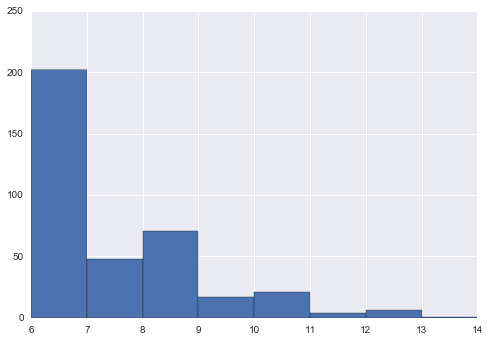

In [42]:
plt.hist(time_final, bins=len(time_final.value_counts()))

<hr>
_Partition the data between male and female students, and compute the average._

In [43]:
guys_data = final_df[final_df.sex.isin(['M'])]
guys_data.head()

,first_semester,first_year,last_semester,last_year,sex
sciper,,,,,
169569,1,2007,6,2009,M
174905,1,2007,6,2011,M
173922,1,2007,5,2009,M
179406,1,2007,6,2010,M
179428,1,2007,6,2010,M


In [44]:
girls_data = final_df[final_df.sex.isin(['F'])]
girls_data.head()

,first_semester,first_year,last_semester,last_year,sex
sciper,,,,,
178706,1,2007,6,2009,F
179988,1,2007,6,2009,F
187420,1,2008,5,2011,F
185811,1,2008,6,2010,F
186778,1,2008,6,2010,F


Compute the average number of semesters for male students.

In [45]:
guys_time = guys_data.apply(get_time_taken, axis=1)
in_at_least_6_semesters_idx = [t>=6 for t in guys_time.values]
guys_time = guys_time[in_at_least_6_semesters_idx]
avg_guys_time = guys_time.mean()
avg_guys_time

7.09593023255814

(array([ 183.,   45.,   68.,   16.,   21.,    4.,    6.,    1.]),
 array([  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.]),
 <a list of 8 Patch objects>)

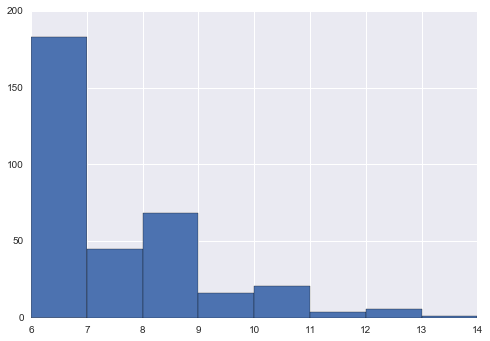

In [46]:
plt.hist(guys_time, bins=len(guys_time.value_counts()))

Compute the average number of semesters for female students.

In [47]:
girls_time = girls_data.apply(get_time_taken, axis=1)
in_at_least_6_semesters_idx = [t>=6 for t in girls_time.values]
girls_time = girls_time[in_at_least_6_semesters_idx]
avg_girls_time = girls_time.mean()
avg_girls_time

6.461538461538462

(array([ 19.,   3.,   3.,   1.]),
 array([ 6.  ,  6.75,  7.5 ,  8.25,  9.  ]),
 <a list of 4 Patch objects>)

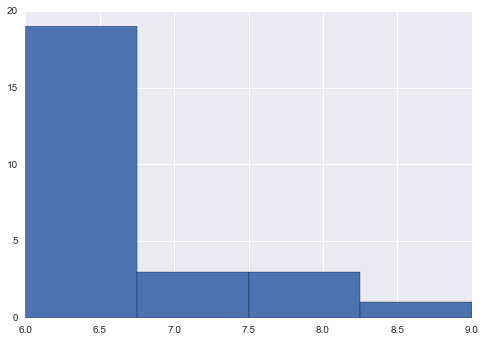

In [48]:
plt.hist(girls_time, bins=len(girls_time.value_counts()))

<hr>
_Is the difference in average statistically significant?_

We want to test if the difference in the mean is statistically significant.<br>
We have two datasets that are not paired, and which we cannot assume to be normally distributed, especially because the number of data points is not very large.<br>
Given these conditions, the Mann-Whitney-U test seemed the most appropriate.

In [49]:
sp.stats.mannwhitneyu(guys_time, girls_time, alternative='two-sided')

MannwhitneyuResult(statistic=5499.0, pvalue=0.031905383484459066)

We use the two-sided test, since we are not only testing whether guys take longer than girls.<br>
The resulting p-value is ~3%, meaning that the difference is **actually statistically significant**.

<hr>
<hr>
# Assignment 2

_Compute the "average stay at EPFL" for master students_

In [50]:
print(acad_years.head())
semesters

Field           Code
2007-2008     978181
2008-2009     978187
2009-2010     978195
2010-2011   39486325
2011-2012  123455150


Field,Code
Bachelor semestre 1,249108
Bachelor semestre 2,249114
Bachelor semestre 3,942155
Bachelor semestre 4,942163
Bachelor semestre 5,942120
Bachelor semestre 5b,2226768
Bachelor semestre 6,942175
Bachelor semestre 6b,2226785
Master semestre 1,2230106
Master semestre 2,942192


Among the different semesters, we are only interested in: `Master semestre 1`, `Master semestre 2`, `Master semestre 3`, `Project Master automne`, `Project Master printemps`.
Note that:
- there is no `Master semestre 4` for CS students;
- there is no `Mineur semestre *` for CS students;
- students doing a semester-long internship are still listed in the correspondent semester (but with `Stage` status). Thus, even if they do a 90-credit Master, they will need at least 4 semesters

In [51]:
def get_frame_from_master_html(html_doc):
    
    # Adapted from: http://nbviewer.jupyter.org/github/chrisalbon/code_py/blob/master/beautiful_soup_scrape_table.ipynb

    # Create four variables to store the scraped data in
    status = []
    sciper = []
    sex = []
    minor = []
    specialization = []
    
    soup = BeautifulSoup(html_doc, 'html.parser')
    table = soup.find("table")

    # Find all the <tr> tag pairs, skip the first two, then for each.
    for row in table.find_all('tr')[2:]:
        # Create a variable of all the <td> tag pairs in each <tr> tag pair
        col = row.find_all('td')

        column_status = col[-5].string.strip()
        status.append(column_status)

        column_sciper = col[-2].string.strip()
        sciper.append(column_sciper)
    
        column_sex = col[0].string.strip()
        if 'Monsieur' in column_sex:
            sex.append('M')
        else:
            sex.append('F')

        if isinstance(col[4].string, str):
            column_spec = col[4].string.strip()
        else:
            column_spec = "No"
        specialization.append(column_spec)
        
        if isinstance(col[6].string, str):
            column_min = 1
        else:
            column_min = 0
        minor.append(column_min)

    # Create a variable of the value of the columns
    columns = {'sex':sex, 'status': status, 'specialization': specialization, 'minor': minor}

    # Create a dataframe from the columns variable
    df = pd.DataFrame(columns, index=sciper)
    df.index.name = 'sciper'
    return df

In [52]:
def get_basic_master_info(acad_unit, acad_year, semester, semester_type):
    html_doc = get_html_page(acad_unit, acad_year, semester, semester_type)
    if html_doc == None:
        return pd.DataFrame()
    df = get_frame_from_master_html(html_doc)
    return df

Collect all master students starting from 2007.

In [53]:
master_semesters_list = ['Master semestre 1', 'Master semestre 2', 'Master semestre 3', \
                         'Projet Master automne', 'Projet Master printemps']

We create a dictionary indexed by year, semester, and semester type, and containing all the relevant information about each student.

In [54]:
# all_masters_dict = dict()
# for i in range(len(acad_years)):
#     for j in range(len(semesters)):
#         for k in range(len(semester_type)):
#             year = acad_years.index[i]
#             sem = semesters.index[j]
#             sem_type = semester_type.index[k]
#             if(int(year.split('-')[0]) >=2007 and sem in master_semesters_list):
#                 basic_info = get_basic_master_info(acad_units.Code['Informatique'], 
#                                                                                 acad_years.Code[year], 
#                                                                                 semesters.Code[sem], 
#                                                                                 semester_type.Code[sem_type])
#                 if not basic_info.empty:
#                     all_masters_dict[(year, sem, sem_type)] = basic_info

In [55]:
# all_masters_data = pd.concat(all_masters_dict)
# all_masters_data.index.names = ['year', 'semester', 'semester_type', 'sciper']
# all_masters_data.head()

In [56]:
# all_masters_data.to_pickle("all_masters_data")

Again, the extracting of information data is commented and instead reloaded from a pickle.

In [57]:
all_masters_data = pd.read_pickle("all_masters_data")
all_masters_data.head()

minor sex  \
year      semester          semester_type      sciper              
2007-2008 Master semestre 1 Semestre d'automne 153066      0   M   
                                               180027      0   F   
                                               152232      0   M   
                                               177395      0   M   
                                               161970      0   M   

                                                      specialization   status  
year      semester          semester_type      sciper                          
2007-2008 Master semestre 1 Semestre d'automne 153066             No  Présent  
                                               180027             No  Présent  
                                               152232             No  Présent  
                                               177395             No  Présent  
                                               161970             No  Présent

Similarly to assignment 1, we group the students by their sciper. At this point, we have 977 master's students.

In [58]:
all_scipers = all_masters_data.index.get_level_values('sciper')
unique_scipers = all_scipers.unique()
unique_scipers.size

977

We reindex the DataFrame to easily manipulate the data later.

In [59]:
all_masters_noindex = all_masters_data.reset_index()
all_masters_final = all_masters_noindex.set_index(['sciper', 'year', 'semester'])
all_masters_final.head()

,,,semester_type,minor,sex,specialization,status
sciper,year,semester,,,,,
153066,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent
180027,2007-2008,Master semestre 1,Semestre d'automne,0,F,No,Présent
152232,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent
177395,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent
161970,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent


In [60]:
all_masters_grouped = all_masters_noindex.groupby(['sciper'])

Add a column to count the minimum number of semesters that a student must have spent, considering whether she does:
- minor or specialization
- semester-long internship

In [61]:
def count_min_semesters(student):
    nbr_additional_semesters = 0
    sums = student.sum()
    
    spec_sum = 0
    for spec_in_year in student['specialization']:
        if(spec_in_year == 'No'):
            spec_sum += 0
        else:
            spec_sum += 1

    minor_spec = spec_sum + sums['minor']
    if minor_spec > 0:
        nbr_additional_semesters = nbr_additional_semesters + 1

    if 'Stage' in sums['status']:
        nbr_additional_semesters = nbr_additional_semesters + 1
    
    # since the minimum duration of a Master is 3 semesters, we have
    min_nbr_semesters = nbr_additional_semesters + 3

    return min_nbr_semesters

In [62]:
min_sems = all_masters_grouped.apply(count_min_semesters)
min_sems_df = pd.DataFrame(min_sems)
min_sems_df.index.name = 'sciper'
min_sems_df.columns = ['min_sems']
min_sems_df.head()

,min_sems
sciper,
128911,4
129093,4
129326,3
138088,3
145546,3


**Assumption:** Remove students for whom we do not know whether they will graduate this year or not.<br>
That is, we remove all students who are enrolled in 2016-2017 and their semester is not Projet Master automne.<br><br>
This also allows us to remove first-year students from our statistics.


Note that there is no student in Projet Master printemps.

So, let's create a list of the scipers enrolled in 2016-2017 but not doing a Master Project

In [63]:
ma_1617_idx = [(y == '2016-2017') and (s != 'Projet Master automne') \
               for y,s in zip(all_masters_final.index.get_level_values('year'), \
                              all_masters_final.index.get_level_values('semester'))]
nbr_ma_1617 = ma_1617_idx.count(True)
nbr_ma_1617

258

In [64]:
ma_1617_scipers_list = list(all_masters_final[ma_1617_idx].index.get_level_values('sciper'))

And we remove them from our statistics

In [65]:
non_graduating_this_year_list = []
for sciper in all_masters_final.index.get_level_values('sciper'):
    if sciper in ma_1617_scipers_list:
        non_graduating_this_year_list.append(False)
    else:
        non_graduating_this_year_list.append(True)

In [66]:
before_1617 = all_masters_final[non_graduating_this_year_list]
before_1617.tail()

,,,semester_type,minor,sex,specialization,status
sciper,year,semester,,,,,
202508,2016-2017,Projet Master automne,Semestre d'automne,0,M,No,Présent
245527,2016-2017,Projet Master automne,Semestre d'automne,0,F,No,Présent
229235,2016-2017,Projet Master automne,Semestre d'automne,0,M,No,Présent
244283,2016-2017,Projet Master automne,Semestre d'automne,0,F,No,Présent
245293,2016-2017,Projet Master automne,Semestre d'automne,0,F,No,Congé


In [67]:
before_1617_noidx = before_1617.reset_index()
before_1617_noidx.head()

,sciper,year,semester,semester_type,minor,sex,specialization,status
0,153066,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent
1,180027,2007-2008,Master semestre 1,Semestre d'automne,0,F,No,Présent
2,152232,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent
3,177395,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent
4,161970,2007-2008,Master semestre 1,Semestre d'automne,0,M,No,Présent


In [68]:
registered_sems_df = pd.DataFrame(before_1617_noidx['sciper'].value_counts())
registered_sems_df.index.name = 'sciper'
registered_sems_df.columns = ['registered_sems']
registered_sems_df.head()

,registered_sems
sciper,
166491,8
179988,7
194182,7
201600,7
146742,7


In order to calculate the number of semesters spent before graduating, we get the first and last occurence of each student. <br>

We notice that the extracted data is not ordered, so we need the last two occurences in order to figure out what the student's last semester was.

In [80]:
def get_first_last_occurence(unique_scipers, data):
    first_year = [int(data.xs(sciper,level='sciper').index[0][0].split("-")[0]) for sciper in unique_scipers]
    first_sem =  [data.xs(sciper,level='sciper').index[0][1] for sciper in unique_scipers]
    last_year = [int(data.xs(sciper,level='sciper').index[-1][0].split("-")[0]) for sciper in unique_scipers]
    last_sem =  [data.xs(sciper,level='sciper').index[-1][1] for sciper in unique_scipers]
    last_sem2 = []
    last_year2 = []
    for sciper in unique_scipers:
        if len(data.xs(sciper,level='sciper').index) >= 2:
            last_sem2.append(data.xs(sciper,level='sciper').index[-2][1])
            last_year2.append(int(data.xs(sciper, level='sciper').index[-2][0].split("-")[0]))
        else:
            last_sem2.append("")
            last_year2.append(0)
    sex = [data.xs(sciper,level='sciper')['sex'][0] for sciper in unique_scipers]
    columns = {'first_semester':first_sem, 'first_year':first_year, 'last_semester':last_sem, 'last_year':last_year, 
               'last_semester2':last_sem2, 'last_year2':last_year2, 'sex': sex}
    df = pd.DataFrame(columns, index=unique_scipers)
    df.index.name = 'sciper'
    return df

In [81]:
first_last_semesters_df = get_first_last_occurence(unique_scipers, all_masters_data)
first_last_semesters_df.head()

,first_semester,first_year,last_semester,last_semester2,last_year,last_year2,sex
sciper,,,,,,,
153066,Master semestre 1,2007,Master semestre 3,Master semestre 2,2009,2009,M
180027,Master semestre 1,2007,Projet Master automne,Master semestre 2,2008,2007,F
152232,Master semestre 1,2007,Master semestre 3,Master semestre 2,2008,2007,M
177395,Master semestre 1,2007,Master semestre 3,Master semestre 2,2008,2007,M
161970,Master semestre 1,2007,Master semestre 3,Master semestre 2,2008,2007,M


To get the total time taken, we substract the last year from the first year, then we add the corresponding semesters as in Assignment 1. Finally, if the student is not enrolled in the thesis projet, then we add a semester for them to account for that.

In [82]:
def get_time_taken(student):
    """Return the number of semesters a student took to graduate"""
    years = student['last_year'] - student['first_year']
    if(student['first_semester'].split(" ")[2] == "1"):
        years += 0.5
    
    if(student['last_semester'].split(" ")[2] == "printemps" or student['last_semester'].split(" ")[2] == "2"):
        years += 0.5
    elif student['last_year'] == student['last_year2'] and (student['last_semester2'].split(" ")[2] == "printemps" 
                                                            or student['last_semester2'].split(" ")[2] == "2"):
        years += 0.5
    
    if not (student['last_semester'].startswith("Projet") or student['last_semester2'].startswith("Projet")):
        years += 0.5
    
    return int(years * 2)

In [83]:
actual_sems = first_last_semesters_df.apply(get_time_taken, axis=1)
actual_sems_df = pd.DataFrame(actual_sems)
actual_sems_df.rename(columns = {0:'actual_sems'},inplace=True)
actual_sems_df.head()

,actual_sems
sciper,
153066,7
180027,3
152232,4
177395,4
161970,4


Here we concatenate the 3 relevant columns, showing the minimum number of semesters each student needs, the number of semester that student appears registered in, and the actual number of semesters between his enrollment date until his graduation date.

In [85]:
sems_per_student = pd.concat([min_sems_df, registered_sems_df, actual_sems_df, first_last_semesters_df['sex']], axis=1)
sems_per_student.dropna(inplace=True)
sems_per_student.index.name = 'sciper'
sems_per_student_final = sems_per_student[sems_per_student['actual_sems'] >= sems_per_student['min_sems']]
sems_per_student_final.head()

,min_sems,registered_sems,actual_sems,sex
sciper,,,,
146330,3,3.0,4,M
146742,4,7.0,9,M
146929,3,2.0,3,M
147008,5,4.0,5,M
152232,4,3.0,4,M


The average number of semesters is then

In [86]:
sems_per_student_final['actual_sems'].mean()

4.254934210526316

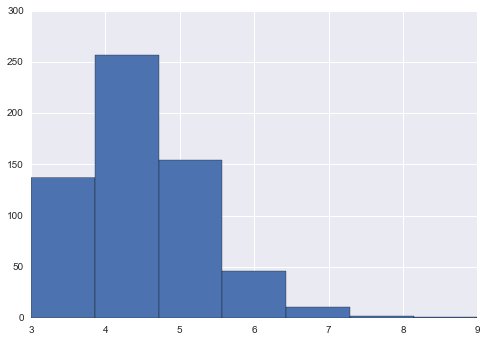

In [87]:
sems_per_student_final['actual_sems'].hist(bins = len(sems_per_student_final['actual_sems'].value_counts()))

<hr>
_Extract all the students with a Spécialisation and compute the "average stay" per each category of that attribute_ 

First, we find all specializations

In [88]:
all_specials = all_masters_final['specialization'].value_counts().index.tolist()
all_specials

['No',
 'Internet computing',
 'Foundations of Software',
 'Signals, Images and Interfaces',
 'Computer Engineering - SP',
 'Software Systems',
 'Biocomputing',
 'Information Security - SP',
 'Data Analytics',
 'Service science',
 'Computer Science Theory',
 'Internet Information Systems']

For each specialization, we collect all students for that specialization. Then, we obtain the time spent by each student and average time per specialization.

In [95]:
sems_per_student_noindx = sems_per_student_final.reset_index()
sems_by_special = {}
avg_by_special = {}

for special in all_specials:
    scipers_by_special = all_masters_noindex.sciper[all_masters_noindex.specialization == special]
    sems_by_special[special] = sems_per_student_noindx[sems_per_student_noindx.sciper.isin(scipers_by_special)]
    avg_by_special[special] = sems_by_special[special].actual_sems.mean()

In [96]:
avg_by_special

{'Biocomputing': 5.0,
 'Computer Engineering - SP': 4.461538461538462,
 'Computer Science Theory': nan,
 'Data Analytics': nan,
 'Foundations of Software': 4.88,
 'Information Security - SP': 5.0,
 'Internet Information Systems': nan,
 'Internet computing': 4.837837837837838,
 'No': 4.213780918727915,
 'Service science': 4.6,
 'Signals, Images and Interfaces': 5.380952380952381,
 'Software Systems': 4.6}

In [97]:
avg_by_special_df = pd.DataFrame.from_dict(avg_by_special, orient='index')
avg_by_special_df.dropna(inplace=True)
avg_by_special_df.columns.name = 'specialization'
avg_by_special_df.rename(columns = {0:'average_stay'}, inplace=True)
avg_by_special_df

specialization,average_stay
Biocomputing,5.000000
Foundations of Software,4.880000
No,4.213781
Computer Engineering - SP,4.461538
Service science,4.600000
"Signals, Images and Interfaces",5.380952
Software Systems,4.600000
Information Security - SP,5.000000
Internet computing,4.837838


_Compared to the general average, can you find any specialization for which the difference in average is statistically significant?_

In [98]:
sp.stats.mannwhitneyu(sems_per_student_final.actual_sems, sems_by_special['No'].actual_sems)[1]

0.21432948561450288

In [99]:
p_value = {}

for special in all_specials:
    p_value[special] = sp.stats.mannwhitneyu(sems_per_student_final.actual_sems, sems_by_special[special].actual_sems)[1]

In [100]:
p_value_df = pd.DataFrame.from_dict(p_value, orient = 'index')
p_value_df.columns.name = 'specialization'
p_value_df.rename(columns = {0:'average_stay'}, inplace=True)
p_value_df

specialization,average_stay
Biocomputing,8.568469e-02
Foundations of Software,4.676758e-06
No,2.143295e-01
Computer Engineering - SP,1.133502e-01
Service science,1.971484e-01
"Signals, Images and Interfaces",7.042186e-06
Software Systems,5.493946e-02
Internet Information Systems,0.000000e+00
Data Analytics,0.000000e+00
Information Security - SP,7.848078e-02


<hr><hr>
# Assignment 3

_Perform the gender-based study also on the Master students, as explained in 1.<br>
Use scatterplots to visually identify changes over time. Plot males and females with different colors_

We will use the last DataFrame that consists of the masters students that we considered in our previous statistic.

In [101]:
sems_per_student_final.head()

,min_sems,registered_sems,actual_sems,sex
sciper,,,,
146330,3,3.0,4,M
146742,4,7.0,9,M
146929,3,2.0,3,M
147008,5,4.0,5,M
152232,4,3.0,4,M


We concatenate it with the `first_year` column from the following DataFrame.

In [102]:
first_last_semesters_df.head()

,first_semester,first_year,last_semester,last_semester2,last_year,last_year2,sex
sciper,,,,,,,
153066,Master semestre 1,2007,Master semestre 3,Master semestre 2,2009,2009,M
180027,Master semestre 1,2007,Projet Master automne,Master semestre 2,2008,2007,F
152232,Master semestre 1,2007,Master semestre 3,Master semestre 2,2008,2007,M
177395,Master semestre 1,2007,Master semestre 3,Master semestre 2,2008,2007,M
161970,Master semestre 1,2007,Master semestre 3,Master semestre 2,2008,2007,M


In [103]:
first_year_and_semesters = pd.concat([sems_per_student_final[['actual_sems', 'sex']], first_last_semesters_df['first_year']], axis=1)
first_year_and_semesters.dropna(inplace=True)
first_year_and_semesters.head()

,actual_sems,sex,first_year
146330,4.0,M,2007
146742,9.0,M,2008
146929,3.0,M,2007
147008,5.0,M,2011
152232,4.0,M,2007


<hr>
_Partition the data between male and female students, and compute the average._

In [104]:
guys_data = first_year_and_semesters[first_year_and_semesters.sex.isin(['M'])]
guys_data.head()

,actual_sems,sex,first_year
146330,4.0,M,2007
146742,9.0,M,2008
146929,3.0,M,2007
147008,5.0,M,2011
152232,4.0,M,2007


In [105]:
girls_data = first_year_and_semesters[first_year_and_semesters.sex.isin(['F'])]
girls_data.head()

,actual_sems,sex,first_year
154573,6.0,F,2007
159998,4.0,F,2008
160148,4.0,F,2007
161024,3.0,F,2007
161091,5.0,F,2008


Compute the average number of semesters for male students.

In [107]:
first_year_and_semesters['actual_sems'].value_counts()

4.0    257
5.0    154
3.0    137
6.0     46
7.0     11
8.0      2
9.0      1
Name: actual_sems, dtype: int64

In [108]:
guys_time = guys_data['actual_sems']
avg_guys_time = guys_time.mean()
avg_guys_time

4.246679316888046

Compute the average number of semesters for female students.

In [109]:
girls_time = girls_data['actual_sems']
avg_girls_time = girls_time.mean()
avg_girls_time

4.308641975308642

As explained in assignment 1, the Mann-Whitney-U test is the most suitable. Here, however, it shows **no statiscal significance** of the difference in the mean.

In [110]:
sp.stats.mannwhitneyu(guys_time, girls_time)

MannwhitneyuResult(statistic=20682.5, pvalue=0.317753739208472)

In order to scatter plot discrete values and have a meaningful plot, we use two techniques:<br>
First, we add jitter to all the data, so as to displace the data points, resulting in a wider area for the data points with higher frequency.<br>
Second, we use a list of circle sizes created from the value counts in each case.<br>
We will use this after computing the average.

In [111]:
def jitter(x):
    stdev = 0.01*(max(x)-min(x))
    return x + np.random.randn(len(x)) * stdev

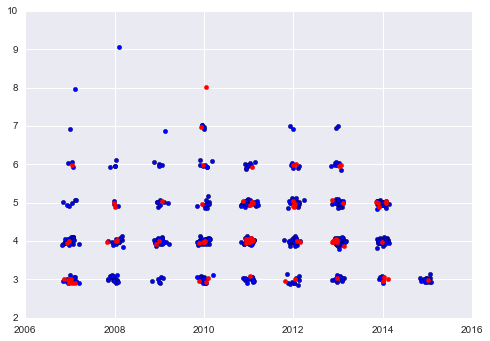

In [113]:
plt.scatter(jitter(guys_data['first_year']), jitter(guys_data['actual_sems']))
plt.scatter(jitter(girls_data['first_year']), jitter(girls_data['actual_sems']), color='red')

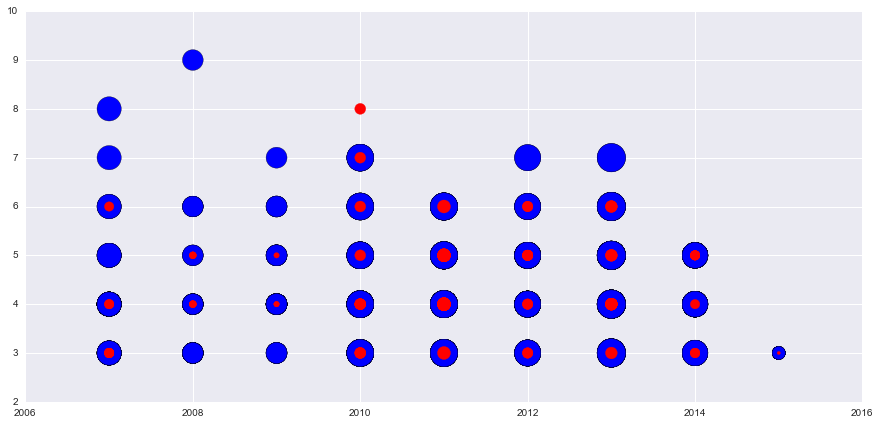

In [115]:
plt.figure(figsize=(15,7))

first_years = guys_data['first_year']
guys_circle_size = [guys_data[first_years == first_years[i]]['first_year'].value_counts()
                    [first_years[i]] for i in range(len(guys_data))]
guys_circle_size = [x * 10 for x in guys_circle_size]
plt.scatter(first_years, guys_data['actual_sems'], guys_circle_size)
plt.ylim((2,10))

first_years = girls_data['first_year']
girls_circle_size = [girls_data[first_years == first_years[i]]['first_year'].value_counts()
                     [first_years[i]] for i in range(len(girls_data))]
girls_circle_size = [x * 10 for x in girls_circle_size]
plt.scatter(first_years, girls_data['actual_sems'], girls_circle_size, color='red')

(2, 10)

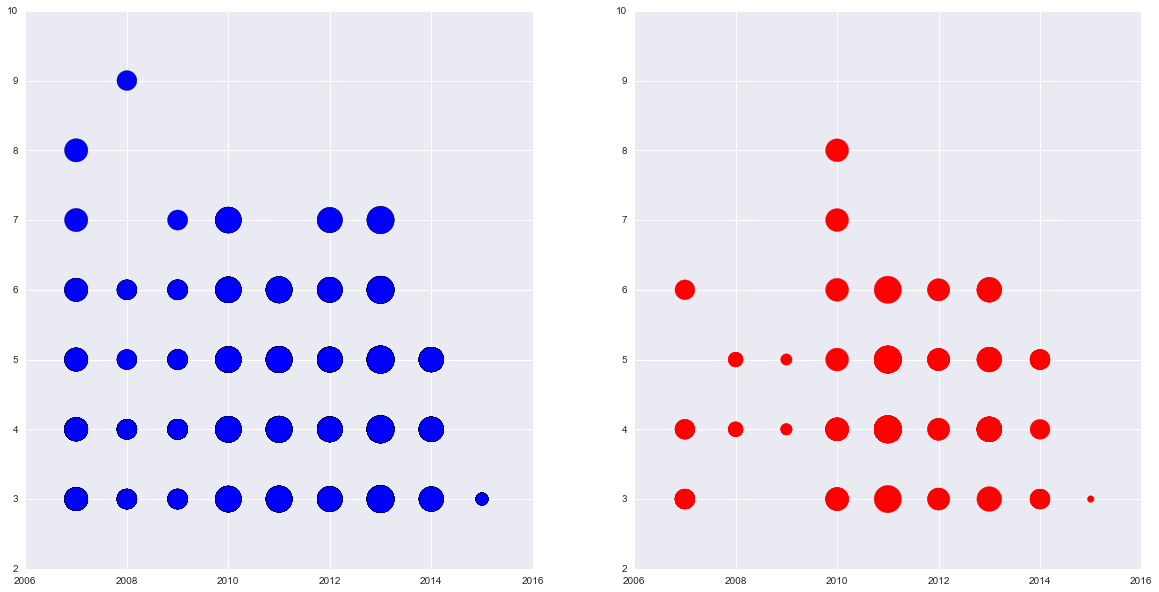

In [116]:
plt.figure(figsize=(20,10))

first_years = guys_data['first_year']
guys_circle_size = guys_circle_size / max(guys_circle_size)
guys_circle_size = [x * 750 for x in guys_circle_size]
plt.subplot(1,2,1)
plt.scatter(first_years, guys_data['actual_sems'], guys_circle_size)
plt.ylim((2,10))

first_years = girls_data['first_year']
girls_circle_size = girls_circle_size / max(girls_circle_size)
girls_circle_size = [x * 750 for x in girls_circle_size]
plt.subplot(1,2,2)
plt.scatter(first_years, girls_data['actual_sems'], girls_circle_size, color='red')
plt.ylim((2,10))

_Can you spot different trends that match the results of your statistical tests?_

The statiscal test shows no statistical significance in the difference of mean between girls and guys. The scatter plots above also don't show any clear trend in that regard. It does show, however, that the number of enrollments in 2010 is higher than the other years.